# Idea: Wine Quality Prediction

# TASK 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Acquisition and Loading

In [2]:
data=pd.read_csv('WineQT.csv')
df=pd.DataFrame(data)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


# Data Exploration

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
null_values=df.isnull().sum()
print(null_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [13]:
df.duplicated().sum()

0

# Data Cleaning

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.fillna(df.mean(), inplace=True)

# Feature Engineering

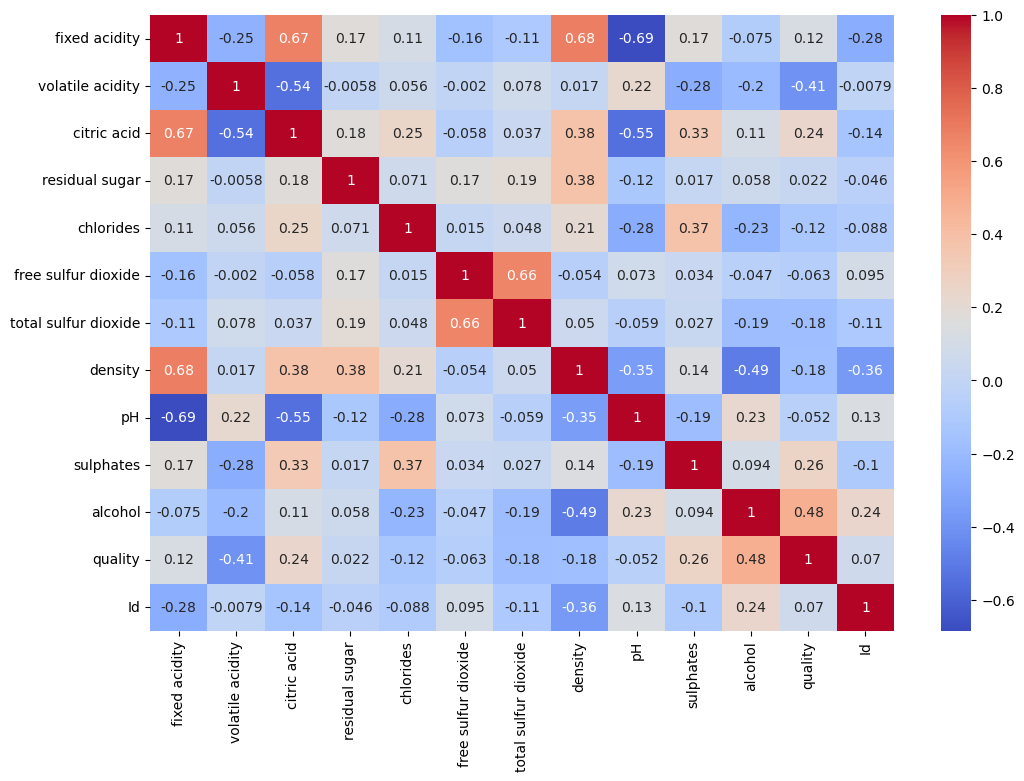

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Classifier Models

In [17]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(['quality'], axis=1)
y = df['quality']

# Binarize the target variable to predict whether the wine is of good quality or not
y = y.apply(lambda x: 1 if x >= 7 else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize models
rf_model = RandomForestClassifier(random_state=40)
sgd_model = SGDClassifier(random_state=40)
svc_model = SVC(random_state=40)

# Train models
rf_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)


SVC(random_state=40)

# Model Evaluation

In [21]:
# Predict on the test set
rf_preds = rf_model.predict(X_test)
sgd_preds = sgd_model.predict(X_test)
svc_preds = svc_model.predict(X_test)

# Evaluate models
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

print("\nStochastic Gradient Descent Classifier:")
print("Accuracy:", accuracy_score(y_test, sgd_preds))
print(classification_report(y_test, sgd_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, sgd_preds))

print("\nSupport Vector Classifier:")
print("Accuracy:", accuracy_score(y_test, svc_preds))
print(classification_report(y_test, svc_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_preds))


Random Forest Classifier:
Accuracy: 0.9082969432314411
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       201
           1       0.65      0.54      0.59        28

    accuracy                           0.91       229
   macro avg       0.79      0.75      0.77       229
weighted avg       0.90      0.91      0.90       229

Confusion Matrix:
 [[193   8]
 [ 13  15]]

Stochastic Gradient Descent Classifier:
Accuracy: 0.8646288209606987
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       201
           1       0.00      0.00      0.00        28

    accuracy                           0.86       229
   macro avg       0.44      0.49      0.46       229
weighted avg       0.77      0.86      0.81       229

Confusion Matrix:
 [[198   3]
 [ 28   0]]

Support Vector Classifier:
Accuracy: 0.8777292576419214
              precision    recall  f1-score   support

           0       0.88  

C:\Users\cw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualization

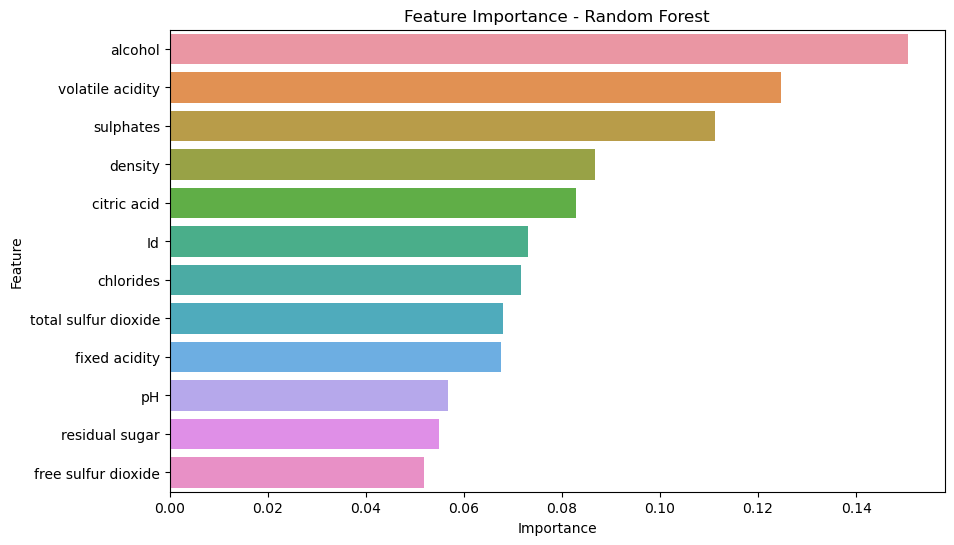

In [22]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

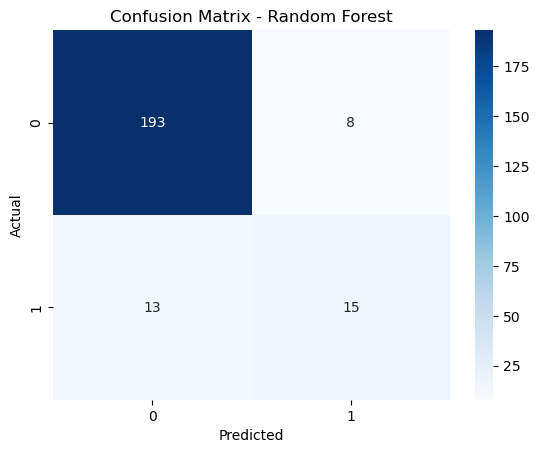

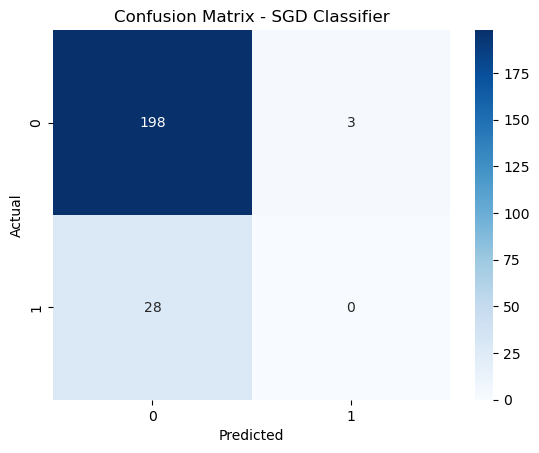

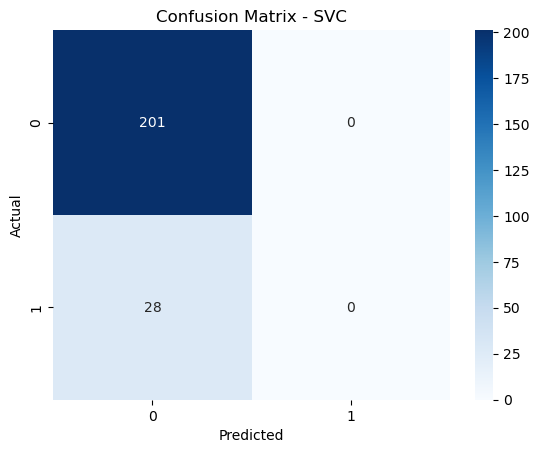

In [23]:
# Plot confusion matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for SGD Classifier
sns.heatmap(confusion_matrix(y_test, sgd_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SGD Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for SVC
sns.heatmap(confusion_matrix(y_test, svc_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Chemical Qualities: 

# Exploratory Data Analysis (EDA)

In [24]:
correlation_matrix = df.corr()
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                   

# Visualize Relationships

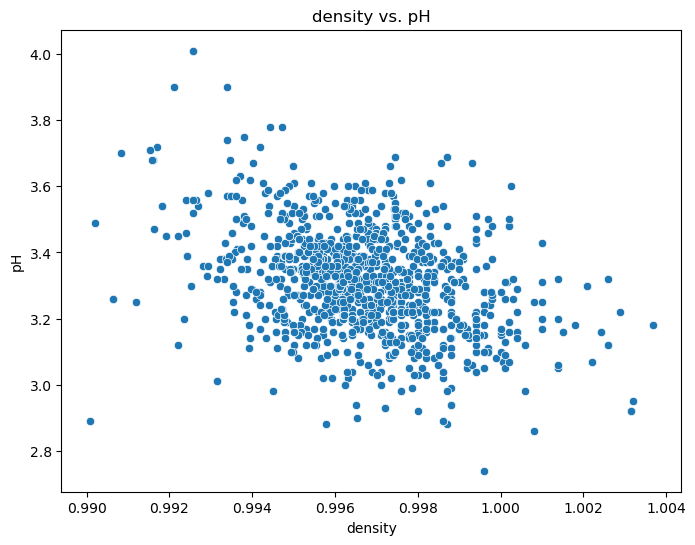

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Scatter plot of density vs. pH  
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='pH', data=df)
plt.title('density vs. pH')
plt.xlabel('density')
plt.ylabel('pH')
plt.show()

# Predictive Modeling

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example: Linear regression to predict wine quality based on acidity and density
X = df[['fixed acidity', 'density']]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.5055843537967321


# Data Analysis Libraries

# Using Pandas for Data Manipulation

In [40]:
df=pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [41]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [42]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [43]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [45]:
column_data = df['alcohol']

In [46]:
# Filtering rows based on a condition
filtered_data = df[df['alcohol'] > 10]

In [47]:
# Handling missing values
df.dropna(inplace=True)  

In [48]:
df.fillna(value=0, inplace=True)  # Fill NaN values with 0

In [49]:
# Removing duplicates
df.drop_duplicates(inplace=True)

# Using NumPy for Array Operations

In [51]:
import numpy as np
# Convert a Pandas Series to a NumPy array
np_array = df['density'].to_numpy()
print(np_array)

[0.9978  0.9968  0.997   ... 0.9949  0.99512 0.99547]


In [53]:
np_array1 = df['pH'].to_numpy()
print(np_array)

[0.9978  0.9968  0.997   ... 0.9949  0.99512 0.99547]


In [55]:
np_array2 = df['quality'].to_numpy()
print(np_array)

[5 5 5 ... 5 6 5]


In [57]:
# Basic arithmetic operations
result = np_array1 + np_array2
print(result)

[8.51 8.2  8.26 ... 8.45 9.52 8.57]


In [58]:
result = np_array1 * 2
print(result)

[7.02 6.4  6.52 ... 6.9  7.04 7.14]


In [59]:
# Statistical operations
mean_value = np.mean(np_array)
print(mean_value)

5.657042869641295


In [60]:
max_value = np.max(np_array)
print(max_value)

8


In [62]:
# Accessing elements
element = np_array[0]
print(element)

5


In [63]:
# Slicing
slice_array = np_array[1:4]
print(slice_array)

[5 5 6]


In [64]:
# Sum of all elements
total_sum = np.sum(np_array)
total_sum

6466

In [65]:
# Cumulative sum
cumulative_sum = np.cumsum(np_array)
cumulative_sum

array([   5,   10,   15, ..., 6455, 6461, 6466], dtype=int64)

In [66]:
mean_value = np.mean(column_data)
mean_value

10.442111402741325

In [67]:
std_deviation = np.std(column_data)
std_deviation

1.0817221048833665

# Data Visualization

# Scatter plot using Matplotlib

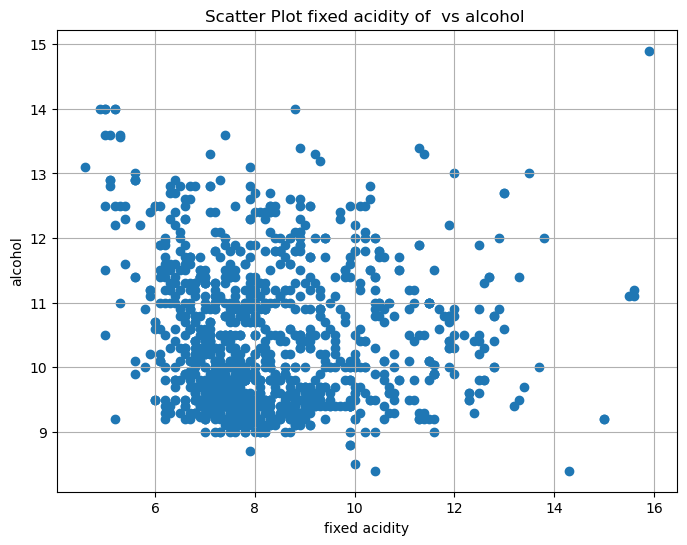

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(df['fixed acidity'], df['alcohol'])
plt.title('Scatter Plot fixed acidity of  vs alcohol ')
plt.xlabel('fixed acidity')
plt.ylabel('alcohol')
plt.grid(True)
plt.show()


# Scatter plot with regression line using Seaborn

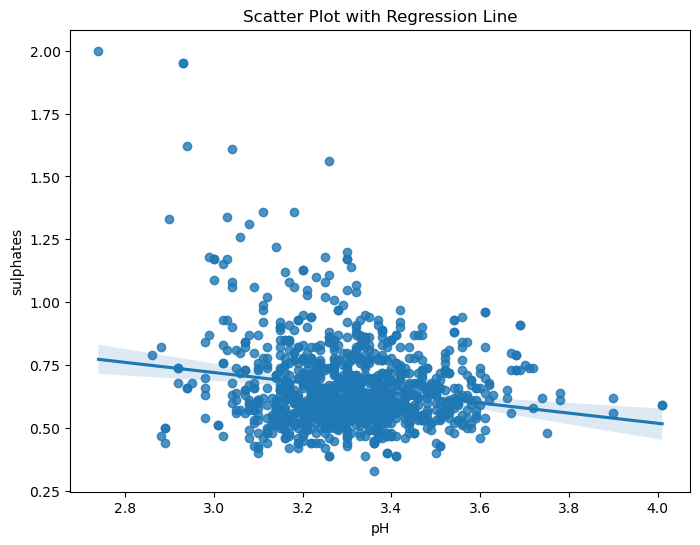

In [69]:
plt.figure(figsize=(8, 6))
sns.regplot(x='pH', y='sulphates', data=df)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('pH')
plt.ylabel('sulphates')
plt.show()
